In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

# US Govenment vs Other Government

In [244]:
data = pd.read_csv('us_gov_oth_gov.csv')
#data = pd.read_csv('us_gov_oth_bus.csv')              ## Only US Government vs Others Business
#data = pd.read_csv('us_bus_oth_gov.csv')              ## Only US Business vs Others Government
#data = pd.read_csv('us_bus_oth_bus.csv')              ## Only US Business vs Others Business
#data = pd.read_csv('overall_data.csv')                ## All government and business data

In [245]:
df = pd.DataFrame(data)
df

,Date,TargetCountry,TargetCountryCode,ReceivingCountry,ReceivingCountryCode,Action,NumArticles,AvgTone,AvgGoldsteinScale
0,19200101,1,1,9,1,161,8,-3.988996,-4.0
1,19200101,1,1,22,1,174,6,-3.416149,-5.0
2,19200101,1,1,34,1,161,2,-3.988996,-4.0
3,19200101,1,1,45,1,172,2,-2.641509,-5.0
4,19200102,1,1,20,1,174,6,-5.460751,-5.0
...,...,...,...,...,...,...,...,...,...
133588,20150319,1,1,25,1,111,1,-3.046358,-2.0
133589,20150320,1,1,12,1,111,30,-0.335643,-2.0
133590,20150320,1,1,25,1,111,1,-3.042328,-2.0
133591,20150321,1,1,8,1,111,3,-5.108359,-2.0


In [246]:
def weighted_avg(df, values, weights):
    return (df[values] * df[weights]).sum() / df[weights].sum()


## Countrywise Analysis

In [247]:
# to find the total articles released on particular action by each country
grouped_data = data.groupby(['ReceivingCountry', 'Action']).agg({'NumArticles': 'sum','AvgTone': 'mean', 'AvgGoldsteinScale': 'mean'}).reset_index()
print(grouped_data)

      ReceivingCountry  Action  NumArticles   AvgTone  AvgGoldsteinScale
0                    2      10         1725 -1.911555                0.0
1                    2      11           49 -2.900947               -0.1
2                    2      12          262 -2.291756               -0.4
3                    2      13          392 -1.463692                0.4
4                    2      14          227 -3.237707                0.0
...                ...     ...          ...       ...                ...
3813                47     831            2 -3.197354                5.0
3814                47     841            6  4.166667                7.0
3815                47     874            2 -0.125945               10.0
3816                47    1121           12 -1.637427               -2.0
3817                47    1822           20 -9.430255               -9.0

[3818 rows x 5 columns]


In [248]:
grouped_data = data.groupby(['ReceivingCountry', 'Action']).agg(
    NumArticles=('NumArticles', 'sum'),
    AvgTone = ('AvgTone', 'mean'),
    Wei_AvgTone=('AvgTone', lambda x: weighted_avg(data.loc[x.index], 'AvgTone', 'NumArticles')),
    AvgGoldsteinScale = ('AvgGoldsteinScale', 'mean'),
    Wei_AvgGoldsteinScale= ('AvgGoldsteinScale', lambda x: weighted_avg(data.loc[x.index], 'AvgGoldsteinScale', 'NumArticles'))
).reset_index()
print(grouped_data)

      ReceivingCountry  Action  NumArticles   AvgTone  Wei_AvgTone  \
0                    2      10         1725 -1.911555    -2.015960   
1                    2      11           49 -2.900947    -2.756889   
2                    2      12          262 -2.291756    -2.569855   
3                    2      13          392 -1.463692    -1.213666   
4                    2      14          227 -3.237707    -3.276311   
...                ...     ...          ...       ...          ...   
3813                47     831            2 -3.197354    -3.197354   
3814                47     841            6  4.166667     4.166667   
3815                47     874            2 -0.125945    -0.125945   
3816                47    1121           12 -1.637427    -1.637427   
3817                47    1822           20 -9.430255    -9.430255   

      AvgGoldsteinScale  Wei_AvgGoldsteinScale  
0                   0.0                    0.0  
1                  -0.1                   -0.1  
2           

In [249]:
# top ten most frequent "Action" values
action_counts = data['Action'].value_counts()
top_ten_actions = action_counts.head(10)
top_ten_actions

40    21080
46    10707
36    10093
10     9787
43     9632
51     9604
42     9136
20     8141
30     3186
13     2832
Name: Action, dtype: int64

In [250]:
# Top 'n' actions taken towards US Government by each country
n = 3  # customizable, I am using top 3 here
top_actions = grouped_data.groupby('ReceivingCountry').apply(lambda x: x.nlargest(n, 'NumArticles')).reset_index(drop=True)
top_actions

,ReceivingCountry,Action,NumArticles,AvgTone,Wei_AvgTone,AvgGoldsteinScale,Wei_AvgGoldsteinScale
0,2,40,8196,-0.922318,-0.970906,1.0,1.0
1,2,46,3086,-1.136595,-1.065771,7.0,7.0
2,2,43,2598,-0.406617,-0.862733,2.8,2.8
3,3,40,666,-1.069526,-1.003015,1.0,1.0
4,3,46,357,-0.701165,-1.032770,7.0,7.0
...,...,...,...,...,...,...,...
133,46,51,880,-0.758351,-0.676941,3.4,3.4
134,46,42,672,-0.032207,0.083550,1.9,1.9
135,47,40,608,-1.000686,-1.180238,1.0,1.0
136,47,51,352,0.808756,1.657858,3.4,3.4


In [251]:
# top ten most frequent "Action" values among top actions
action_counts_b = top_actions['Action'].value_counts()
top_ten_actions_b = action_counts_b.head(10)
top_ten_actions_b

40    46
36    28
46    26
51    13
43     7
10     7
42     7
12     1
20     1
30     1
Name: Action, dtype: int64

This shows that Action 40 appeared 46 times among the top action list

In [253]:
# to get top 3 actions by particular country.
my_country = 14     # customizable 
country_top = top_actions[top_actions['ReceivingCountry'] == my_country]
country_top

,ReceivingCountry,Action,NumArticles,AvgTone,Wei_AvgTone,AvgGoldsteinScale,Wei_AvgGoldsteinScale
36,14,40,13737,-0.712381,-0.967731,1.0,1.0
37,14,36,7011,-0.567015,-0.690812,4.0,4.0
38,14,46,6965,-0.626612,-0.729534,7.0,7.0


In [254]:
tact = country_top['Action'].tolist()
ttone = country_top['AvgTone'].tolist()
wtone = country_top['Wei_AvgTone'].tolist()
print('Top 3 actions taken by country',my_country, '=\n', tact)
print('\nAverage tone of top 3 actions taken by country',my_country, '=\n', ttone)
print('\nWeighted average tone of top 3 actions taken by country',my_country, '=\n', wtone)

Top 3 actions taken by country 14 =
 [40, 36, 46]

Average tone of top 3 actions taken by country 14 =
 [-0.7123813369490509, -0.5670146576245552, -0.6266115711770658]

Weighted average tone of top 3 actions taken by country 14 =
 [-0.9677312270932518, -0.6908119525315932, -0.7295343244549893]


## Overall Analysis

In [255]:
unique_countries = data[['TargetCountry', 'ReceivingCountry']].drop_duplicates()
unique_countries_name = unique_countries.sort_values(by=['ReceivingCountry'])
unique_countries_list = unique_countries_name['ReceivingCountry'].tolist()
print(unique_countries_list)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


In [256]:
action_analysis_all = data.groupby(['Action']).agg(
    AvgTone = ('AvgTone', 'mean'),
    Wei_AvgTone = ('AvgTone', lambda x: weighted_avg(data.loc[x.index], 'AvgTone', 'NumArticles')),
    AvgGoldsteinScale = ('AvgGoldsteinScale','mean'),
    Wei_AvgGoldsteinScale = ('AvgGoldsteinScale', lambda x: weighted_avg(data.loc[x.index], 'AvgGoldsteinScale', 'NumArticles')),
    NumInteractions= ('ReceivingCountry', 'count')
).reset_index()
#

In [257]:
action_analysis_all

,Action,AvgTone,Wei_AvgTone,AvgGoldsteinScale,Wei_AvgGoldsteinScale,NumInteractions
0,10,-1.737088,-1.772401,0.0,0.0,9787
1,11,-2.601022,-2.658238,-0.1,-0.1,381
2,12,-2.688826,-2.768179,-0.4,-0.4,2177
3,13,-1.526105,-1.492877,0.4,0.4,2832
4,14,-1.888785,-1.894389,0.0,0.0,883
...,...,...,...,...,...,...
202,1821,-3.968442,-3.834522,-9.0,-9.0,20
203,1822,-4.148717,-4.251303,-9.0,-9.0,59
204,1823,-6.423808,-6.938265,-10.0,-10.0,6
205,1831,-7.839165,-7.570041,-10.0,-10.0,4


In [258]:
action_analysis_all[action_analysis_all['Action']==40]

,Action,AvgTone,Wei_AvgTone,AvgGoldsteinScale,Wei_AvgGoldsteinScale,NumInteractions
28,40,-0.932763,-1.121644,1.0,1.0,21080


In [259]:
sorted_all = action_analysis_all.sort_values(by=['NumInteractions'], ascending=False)
print(sorted_all)

     Action   AvgTone  Wei_AvgTone  AvgGoldsteinScale  Wei_AvgGoldsteinScale  \
28       40 -0.932763    -1.121644                1.0                    1.0   
34       46 -0.958883    -1.105199                7.0                    7.0   
24       36 -0.642144    -0.688227                4.0                    4.0   
0        10 -1.737088    -1.772401                0.0                    0.0   
31       43 -0.630560    -0.634333                2.8                    2.8   
..      ...       ...          ...                ...                    ...   
70      105 -0.219298    -0.219298               -5.0                   -5.0   
153     351  0.000000     0.000000                7.0                    7.0   
183    1232 -1.700843    -1.700843               -4.0                   -4.0   
65       93 -4.315476    -4.315476               -2.0                   -2.0   
130     212 -2.609263    -2.609263                3.4                    3.4   

     NumInteractions  
28             2

In [260]:
cact = sorted_all['Action'].tolist()
cact3 = cact[0:3]
ctone = sorted_all['AvgTone'].tolist()
ctone3 = ctone[0:3]
wtone = sorted_all['Wei_AvgTone'].tolist()
wtone3 = ctone[0:3]
print('Top 3 actions taken towards US by other Goverments =\n', cact3)
print('\nAverage tone of top 3 actions towards US by other Goverments =\n', ctone3)
print('\nWeighted average tone of top 3 actions towards US by other Goverments =\n', wtone3)

Top 3 actions taken towards US by other Goverments =
 [40, 46, 36]

Average tone of top 3 actions towards US by other Goverments =
 [-0.9327625336810721, -0.9588834235573923, -0.6421440074710195]

Weighted average tone of top 3 actions towards US by other Goverments =
 [-0.9327625336810721, -0.9588834235573923, -0.6421440074710195]


### Graphical Representation

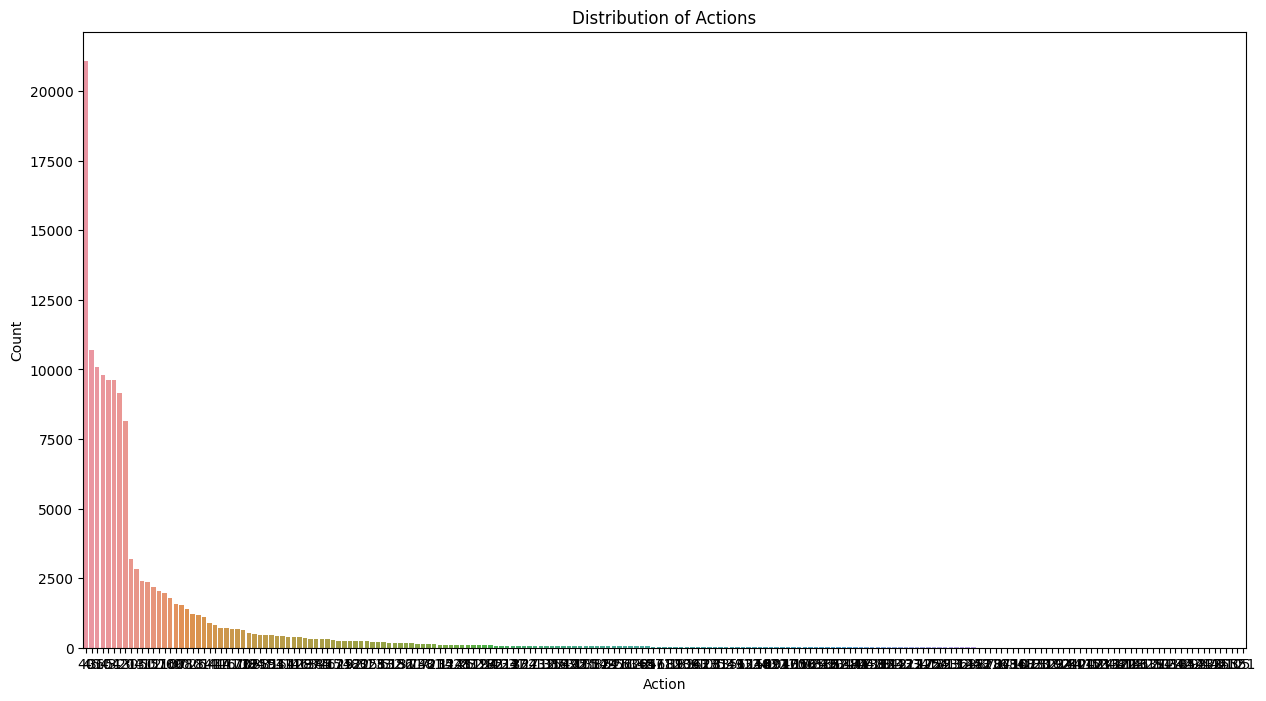

In [261]:
# Plot the distribution of actions
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='Action', order= data['Action'].value_counts().index)
plt.title('Distribution of Actions')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


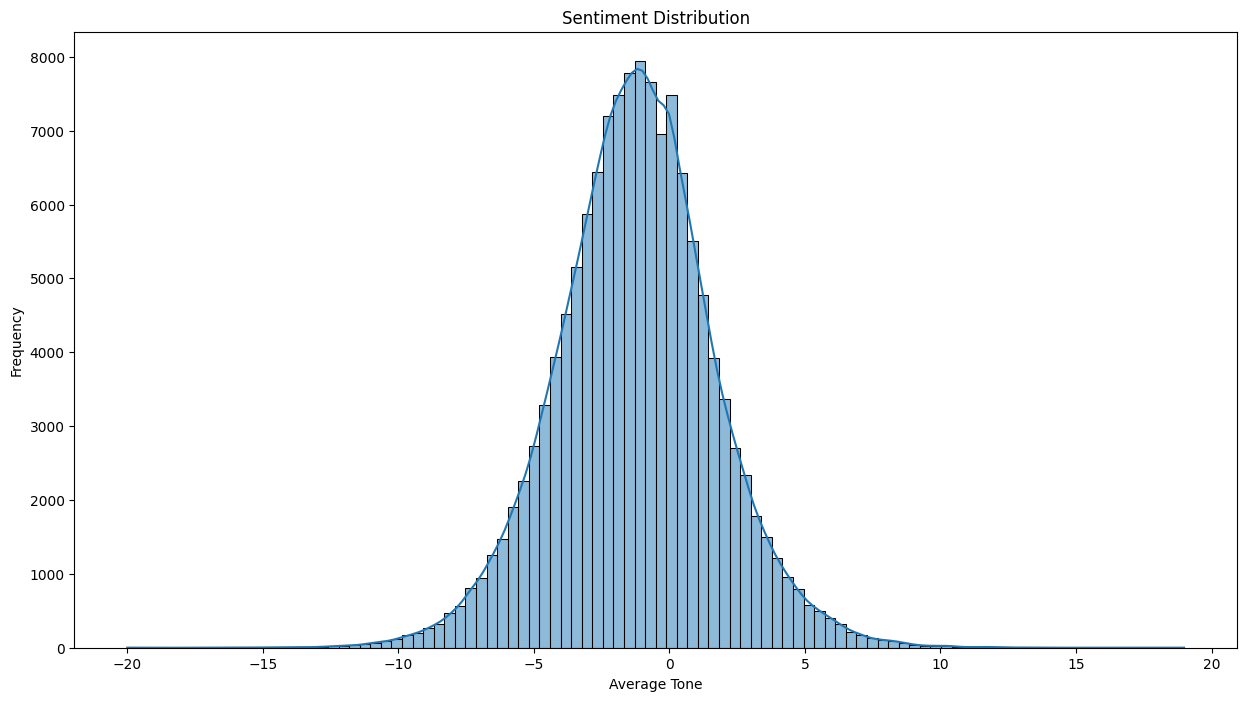

In [262]:
# Plot the sentiment distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['AvgTone'], bins=100, kde=True)
#sns.displot(data['AvgTone'], kind='kde')
plt.title('Sentiment Distribution')
plt.xlabel('Average Tone')
plt.ylabel('Frequency')
plt.show()